PACKING METRICS FOR 18.0mm CELLS


,Array (XxY),Cell Diam (mm),Sq Dims (mm),Hex Dims (mm),Sq Eff (%),Hex Eff (%),Delta (%)
0,2x2,18.0,36.0 x 36.0,45.0 x 33.6,78.54,67.34,-11.20
1,5x5,18.0,90.0 x 90.0,99.0 x 80.4,78.54,79.97,1.43
2,10x10,18.0,180.0 x 180.0,189.0 x 158.3,78.54,85.06,6.52
3,12x6,18.0,216.0 x 108.0,225.0 x 95.9,78.54,84.87,6.33


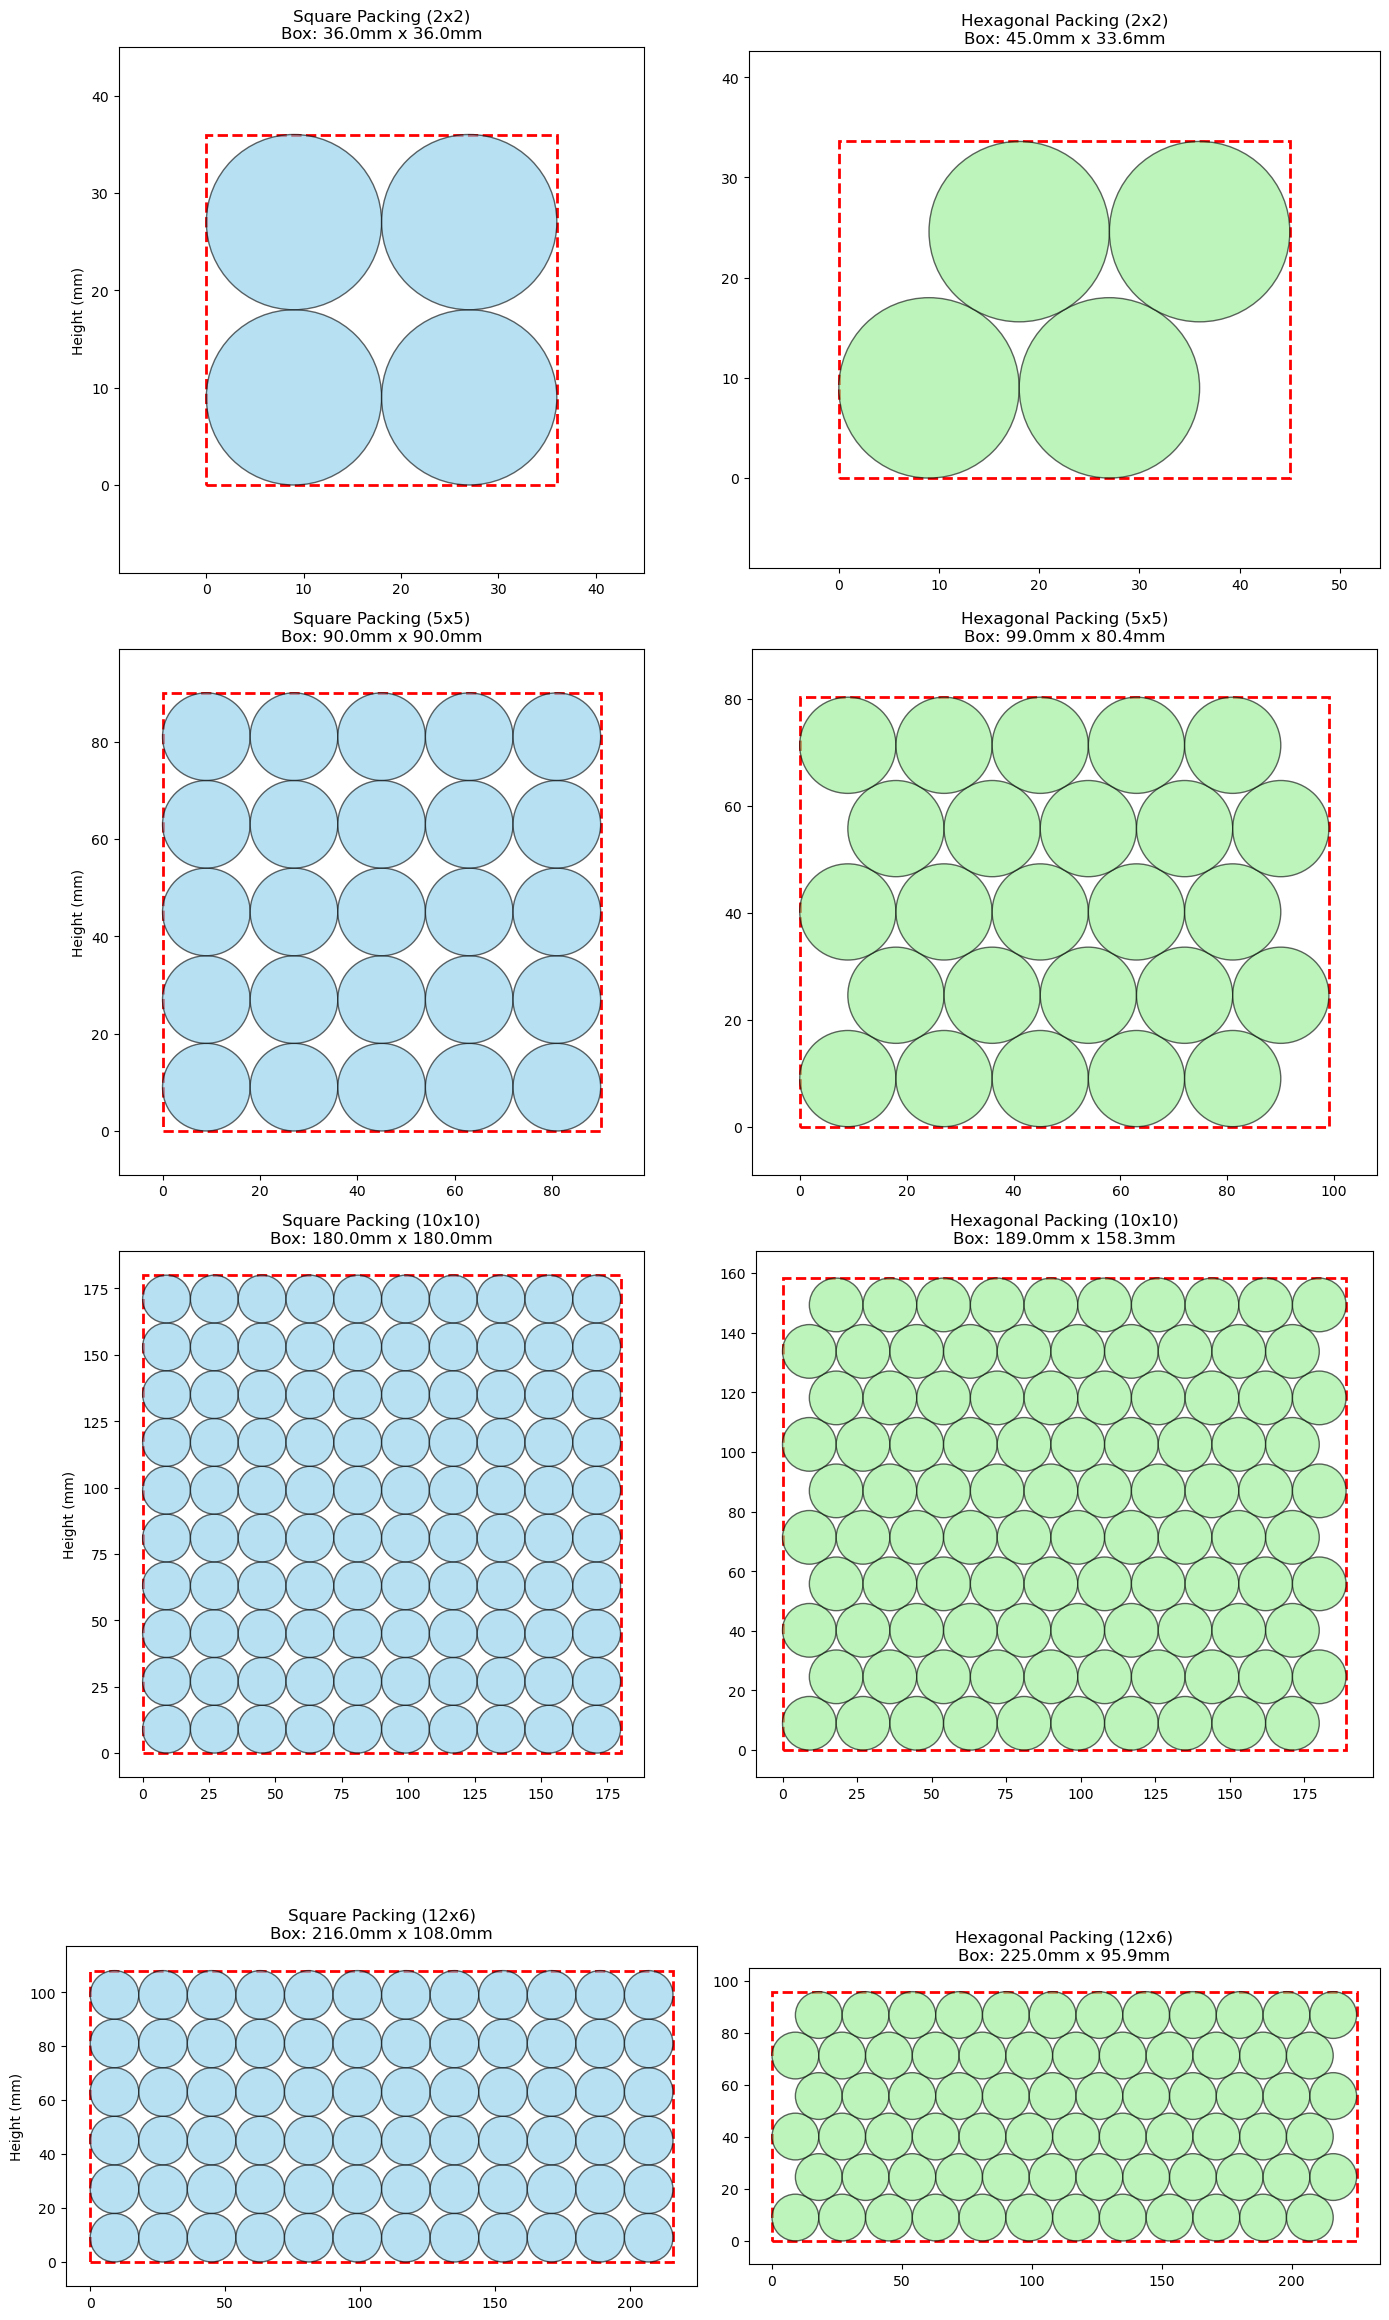

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import pandas as pd
import numpy as np

def calculate_packing_metrics(x_count, y_count, diameter_mm=18.0):
    """
    Calculates packing efficiency and physical bounding box dimensions.
    """
    radius = diameter_mm / 2.0
    cell_area = np.pi * (radius ** 2)
    
    # --- Square Packing ---
    sq_width = x_count * diameter_mm
    sq_height = y_count * diameter_mm
    
    sq_box_area = sq_width * sq_height
    sq_total_cell_area = (x_count * y_count) * cell_area
    sq_efficiency = sq_total_cell_area / sq_box_area
    
    # --- Hexagonal Packing ---
    # Width: Max width is (x_count * D) + (0.5 * D) due to staggered rows
    hex_width = (x_count * diameter_mm) + (0.5 * diameter_mm)
    
    # Height: (rows-1) * spacing + 1 diameter
    row_spacing = (np.sqrt(3) / 2) * diameter_mm
    hex_height = ((y_count - 1) * row_spacing) + diameter_mm
    
    hex_box_area = hex_width * hex_height
    hex_total_cell_area = (x_count * y_count) * cell_area
    hex_efficiency = hex_total_cell_area / hex_box_area
    
    return {
        "Array (XxY)": f"{x_count}x{y_count}",
        "Cell Diam (mm)": diameter_mm,
        "Sq Dims (mm)": f"{sq_width:.1f} x {sq_height:.1f}",
        "Hex Dims (mm)": f"{hex_width:.1f} x {hex_height:.1f}",
        "Sq Eff (%)": round(sq_efficiency * 100, 2),
        "Hex Eff (%)": round(hex_efficiency * 100, 2),
        "Delta (%)": round((hex_efficiency - sq_efficiency) * 100, 2)
    }

def visualize_all_configs(grid_tests, diameter_mm=18.0):
    """
    Plots a row for every configuration in grid_tests.
    """
    radius = diameter_mm / 2.0
    nrows = len(grid_tests)
    
    # Create a figure tall enough to hold all rows (6 inches per row)
    fig, axes = plt.subplots(nrows, 2, figsize=(14, 6 * nrows))
    
    # If there's only 1 config, axes is 1D array; force it to 2D for consistent indexing
    if nrows == 1:
        axes = [axes]
    
    for idx, (x_count, y_count) in enumerate(grid_tests):
        # --- Plot 1: Square Packing (Left Column) ---
        ax = axes[idx][0]
        sq_width = x_count * diameter_mm
        sq_height = y_count * diameter_mm
        
        # Bounding Box
        rect = patches.Rectangle((0,0), sq_width, sq_height, linewidth=2, edgecolor='red', facecolor='none', linestyle='--')
        ax.add_patch(rect)
        
        # Cells
        for i in range(x_count):
            for j in range(y_count):
                cx = radius + i * diameter_mm
                cy = radius + j * diameter_mm
                circle = patches.Circle((cx, cy), radius, edgecolor='black', facecolor='skyblue', alpha=0.6)
                ax.add_patch(circle)
        
        ax.set_xlim(-radius, sq_width + radius)
        ax.set_ylim(-radius, sq_height + radius)
        ax.set_aspect('equal')
        ax.set_title(f"Square Packing ({x_count}x{y_count})\nBox: {sq_width:.1f}mm x {sq_height:.1f}mm")
        ax.set_ylabel("Height (mm)")

        # --- Plot 2: Hexagonal Packing (Right Column) ---
        ax = axes[idx][1]
        
        row_spacing = (np.sqrt(3) / 2) * diameter_mm
        hex_width = (x_count * diameter_mm) + radius
        hex_height = ((y_count - 1) * row_spacing) + diameter_mm
        
        # Bounding Box
        rect = patches.Rectangle((0,0), hex_width, hex_height, linewidth=2, edgecolor='red', facecolor='none', linestyle='--')
        ax.add_patch(rect)
        
        # Cells
        for row in range(y_count):
            y_center = radius + row * row_spacing
            x_offset = 0 if row % 2 == 0 else radius
            for col in range(x_count):
                x_center = radius + col * diameter_mm + x_offset
                circle = patches.Circle((x_center, y_center), radius, edgecolor='black', facecolor='lightgreen', alpha=0.6)
                ax.add_patch(circle)

        ax.set_xlim(-radius, hex_width + radius)
        ax.set_ylim(-radius, hex_height + radius)
        ax.set_aspect('equal')
        ax.set_title(f"Hexagonal Packing ({x_count}x{y_count})\nBox: {hex_width:.1f}mm x {hex_height:.1f}mm")

    plt.tight_layout()
    plt.show()

# --- EXECUTION ---
DIAMETER = 18.0 
# Add as many configs as you want here:
GRID_TESTS = [(2,2), (5,5), (10,10), (12, 6),(2,16),(3,16,)]

# 1. Generate & Display Table
data = [calculate_packing_metrics(x, y, DIAMETER) for x, y in GRID_TESTS]
df = pd.DataFrame(data)

from IPython.display import display
print(f"PACKING METRICS FOR {DIAMETER}mm CELLS")
display(df)

# 2. Visualize All Configs
visualize_all_configs(GRID_TESTS, DIAMETER)

PACKING METRICS FOR 18.0mm CELLS


,Array,Diam,Sq Dims,Hex Dims,Sq Eff,Hex Eff
0,2x2,18.0,36.0x36.0,45.0x33.6,0.785398,0.673430
1,5x5,18.0,90.0x90.0,99.0x80.4,0.785398,0.799711
2,10x10,18.0,180.0x180.0,189.0x158.3,0.785398,0.850556
3,12x6,18.0,216.0x108.0,225.0x95.9,0.785398,0.848740
4,2x16,18.0,36.0x288.0,45.0x251.8,0.785398,0.718572
5,3x16,18.0,54.0x288.0,63.0x251.8,0.785398,0.769899
6,16x2,18.0,288.0x36.0,297.0x33.6,0.785398,0.816279
7,16x3,18.0,288.0x54.0,297.0x49.2,0.785398,0.836293


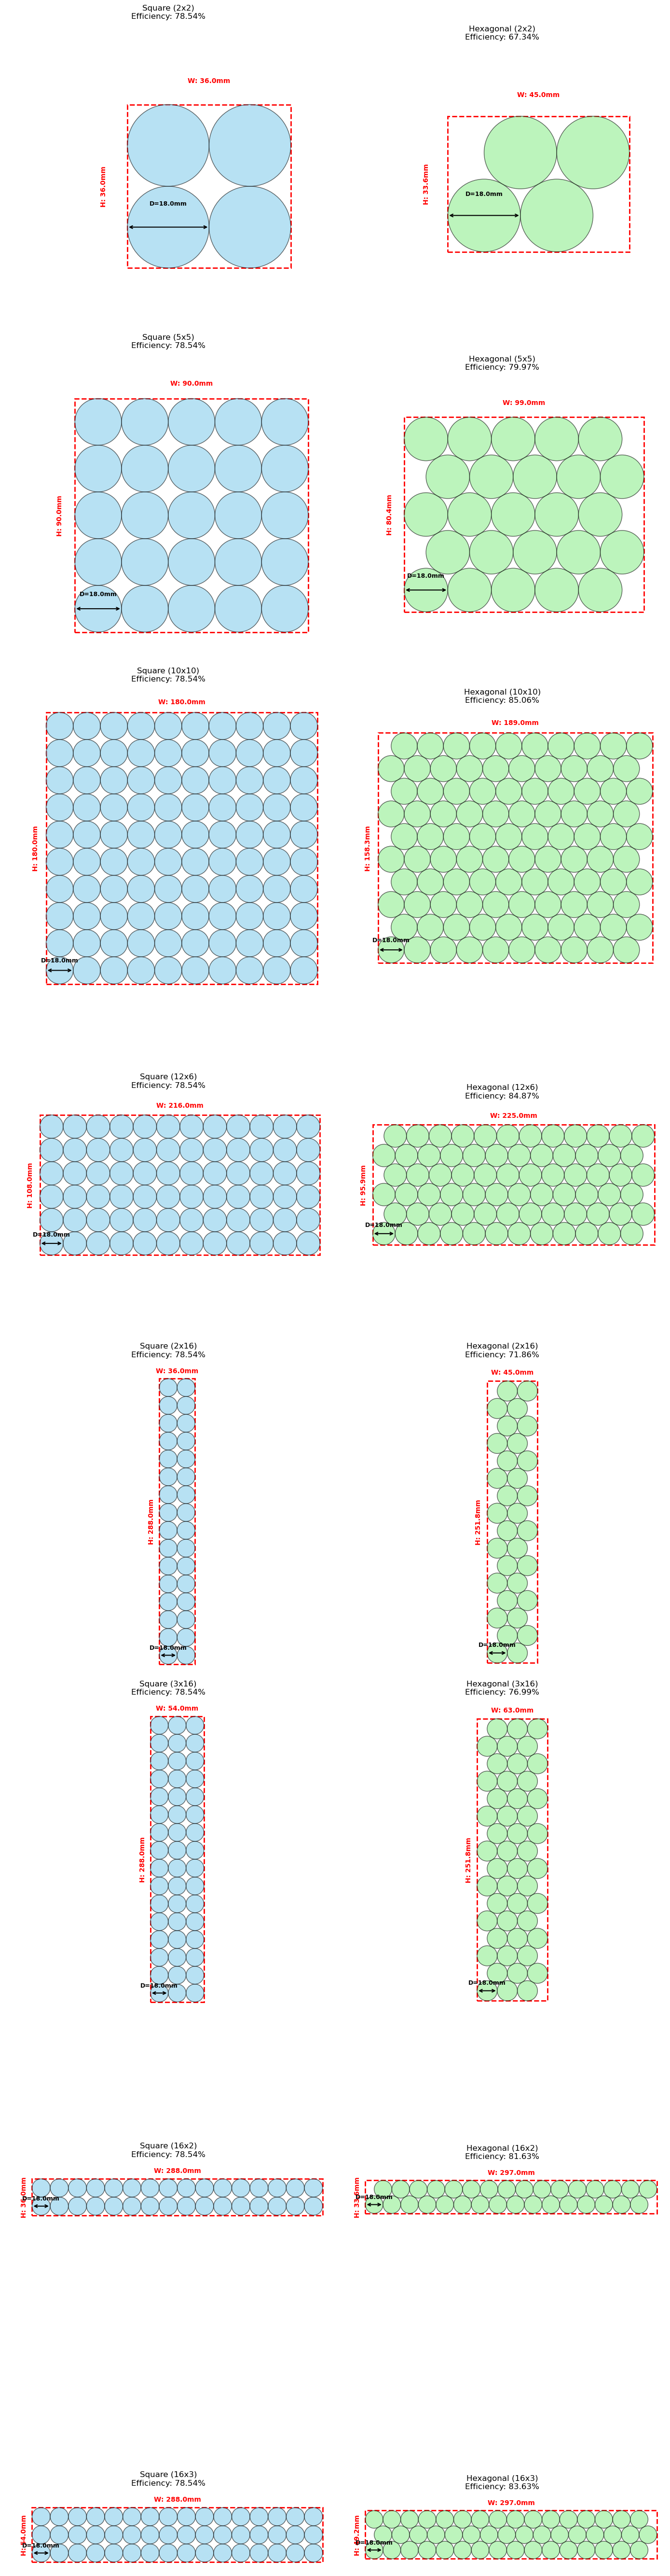

In [5]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import pandas as pd
import numpy as np

def calculate_packing_metrics(x_count, y_count, diameter_mm=18.0):
    radius = diameter_mm / 2.0
    cell_area = np.pi * (radius ** 2)
    
    # --- Square Packing ---
    sq_width = x_count * diameter_mm
    sq_height = y_count * diameter_mm
    sq_box_area = sq_width * sq_height
    sq_total_cell_area = (x_count * y_count) * cell_area
    sq_efficiency = sq_total_cell_area / sq_box_area
    
    # --- Hexagonal Packing ---
    hex_width = (x_count * diameter_mm) + (0.5 * diameter_mm)
    row_spacing = (np.sqrt(3) / 2) * diameter_mm
    hex_height = ((y_count - 1) * row_spacing) + diameter_mm
    hex_box_area = hex_width * hex_height
    hex_total_cell_area = (x_count * y_count) * cell_area
    hex_efficiency = hex_total_cell_area / hex_box_area
    
    return {
        "Array": f"{x_count}x{y_count}",
        "Diam": diameter_mm,
        "Sq Dims": f"{sq_width:.1f}x{sq_height:.1f}",
        "Hex Dims": f"{hex_width:.1f}x{hex_height:.1f}",
        "Sq Eff": sq_efficiency,
        "Hex Eff": hex_efficiency,
        "Sq Width": sq_width, "Sq Height": sq_height,
        "Hex Width": hex_width, "Hex Height": hex_height
    }

def draw_dims(ax, width, height, offset=2):
    """ Helper to draw dimension text on the box edges """
    # Width Label (Top)
    ax.text(width / 2, height + offset, f"W: {width:.1f}mm", 
            ha='center', va='bottom', color='red', fontweight='bold')
    
    # Height Label (Left)
    ax.text(-offset, height / 2, f"H: {height:.1f}mm", 
            ha='right', va='center', rotation=90, color='red', fontweight='bold')

def draw_diameter_callout(ax, center_x, center_y, radius):
    """ Draws a dimension line across a cell to show diameter """
    # Draw a horizontal line across the cell center
    d = radius * 2
    ax.annotate(
        '', xy=(center_x - radius, center_y), xytext=(center_x + radius, center_y),
        arrowprops=dict(arrowstyle='<->', color='black', lw=1.5)
    )
    # Label it
    ax.text(center_x, center_y + (radius/2), f"D={d}mm", 
            ha='center', va='bottom', fontsize=9, fontweight='bold', color='black')

def visualize_all_configs(grid_tests, diameter_mm=18.0):
    radius = diameter_mm / 2.0
    nrows = len(grid_tests)
    
    # Taller figure to accommodate text labels
    fig, axes = plt.subplots(nrows, 2, figsize=(14, 7 * nrows))
    if nrows == 1: axes = [axes]
    
    for idx, (x_count, y_count) in enumerate(grid_tests):
        stats = calculate_packing_metrics(x_count, y_count, diameter_mm)
        
        # --- Plot 1: Square Packing ---
        ax = axes[idx][0]
        w, h = stats['Sq Width'], stats['Sq Height']
        
        # Box & Dims
        rect = patches.Rectangle((0,0), w, h, linewidth=2, edgecolor='red', facecolor='none', linestyle='--')
        ax.add_patch(rect)
        draw_dims(ax, w, h, offset=radius*0.5)
        
        # Cells
        for i in range(x_count):
            for j in range(y_count):
                cx = radius + i * diameter_mm
                cy = radius + j * diameter_mm
                circle = patches.Circle((cx, cy), radius, edgecolor='black', facecolor='skyblue', alpha=0.6)
                ax.add_patch(circle)
                # Callout on bottom-left cell
                if i == 0 and j == 0:
                    draw_diameter_callout(ax, cx, cy, radius)
        
        ax.set_xlim(-radius*3, w + radius)
        ax.set_ylim(-radius, h + radius*2) # Extra room for top label
        ax.set_aspect('equal')
        ax.set_title(f"Square ({x_count}x{y_count})\nEfficiency: {stats['Sq Eff']:.2%}", fontsize=12)
        ax.axis('off') # Turn off standard axis to make our custom labels pop

        # --- Plot 2: Hexagonal Packing ---
        ax = axes[idx][1]
        w, h = stats['Hex Width'], stats['Hex Height']
        row_spacing = (np.sqrt(3) / 2) * diameter_mm
        
        # Box & Dims
        rect = patches.Rectangle((0,0), w, h, linewidth=2, edgecolor='red', facecolor='none', linestyle='--')
        ax.add_patch(rect)
        draw_dims(ax, w, h, offset=radius*0.5)
        
        # Cells
        for row in range(y_count):
            y_center = radius + row * row_spacing
            x_offset = 0 if row % 2 == 0 else radius
            for col in range(x_count):
                x_center = radius + col * diameter_mm + x_offset
                circle = patches.Circle((x_center, y_center), radius, edgecolor='black', facecolor='lightgreen', alpha=0.6)
                ax.add_patch(circle)
                # Callout on bottom-left cell
                if row == 0 and col == 0:
                    draw_diameter_callout(ax, x_center, y_center, radius)

        ax.set_xlim(-radius*3, w + radius)
        ax.set_ylim(-radius, h + radius*2)
        ax.set_aspect('equal')
        ax.set_title(f"Hexagonal ({x_count}x{y_count})\nEfficiency: {stats['Hex Eff']:.2%}", fontsize=12)
        ax.axis('off')

    plt.tight_layout()
    plt.show()

# --- EXECUTION ---
DIAMETER = 18.0 
GRID_TESTS = [(2,2), (5,5), (10,10), (12, 6),(2,16),(3,16,),(16,2),(16,3,)]

# 1. Generate Table
data = [calculate_packing_metrics(x, y, DIAMETER) for x, y in GRID_TESTS]
df = pd.DataFrame(data).drop(columns=['Sq Width', 'Sq Height', 'Hex Width', 'Hex Height']) # Clean table

from IPython.display import display
print(f"PACKING METRICS FOR {DIAMETER}mm CELLS")
display(df)

# 2. Visualize
visualize_all_configs(GRID_TESTS, DIAMETER)